In [1]:
import json
import os
from train import Trainer
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

import torch
torch.cuda.is_available()

/home/zuzanna/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['/home/zuzanna/miniconda3/lib/python312.zip', '/home/zuzanna/miniconda3/lib/python3.12', '/home/zuzanna/miniconda3/lib/python3.12/lib-dynload', '', '/home/zuzanna/miniconda3/lib/python3.12/site-packages', '/home']


/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSRDataset from `anndata.expe

True

In [2]:
# Initialize the Trainer
my_trainer = Trainer(config_path="./config_alldatasets.json")

# Load all datasets
datasets = my_trainer.load_datasets()



Loaded configuration successfully.
Datasets Detected: ['dataset_Pbmc10k', 'dataset_TEA']
Loaded configuration successfully.
Loaded configuration successfully.
Added `interval` annotation for features from /home/zuzanna/data/GSM4949911_X061-AP0C1W1_leukopak_perm-cells_tea_fulldepth_cellrangerarc_filtered_feature_bc_matrix.h5
Loaded configuration successfully.
Added `interval` annotation for features from /home/zuzanna/data/GSM4949911_X061-AP0C1W1_leukopak_perm-cells_tea_fulldepth_cellrangerarc_filtered_feature_bc_matrix.h5
Loaded configuration successfully.
Loaded configuration successfully.


In [3]:
datasets

{'dataset_Pbmc10k': {'modalities': ['rna', 'atac'],
  'data': [AnnData object with n_obs × n_vars = 9578 × 2000
       obs: 'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
       var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
       uns: 'log1p', 'hvg'
       layers: 'counts',
   AnnData object with n_obs × n_vars = 9538 × 15000
       obs: 'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
       var: 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'lo


=== Processing dataset: dataset_Pbmc10k ===
Initializing Mowgli Model
Loaded configuration successfully.
Loaded models for dataset_Pbmc10k: dict_keys(['mowgli'])

Training model: mowgli for dataset: dataset_Pbmc10k
Moving Mowgli model to cuda:0
Mowgli model successfully moved to cuda:0
Training Mowgli Model


  2%|▏         | 4/200 [00:08<07:09,  2.19s/it, loss=-0.25378174, mass_transported=0.0364, loss_inner=0.10507692, inner_steps=0, gpu_memory_allocated=2.87e+9] 


Training completed.
Generating UMAP plot


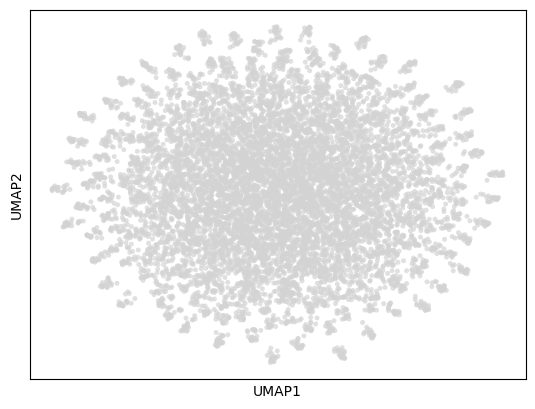

UMAP plot saved to outputs/mowgli_output/mowgli_dataset_Pbmc10k_umap_plot.png


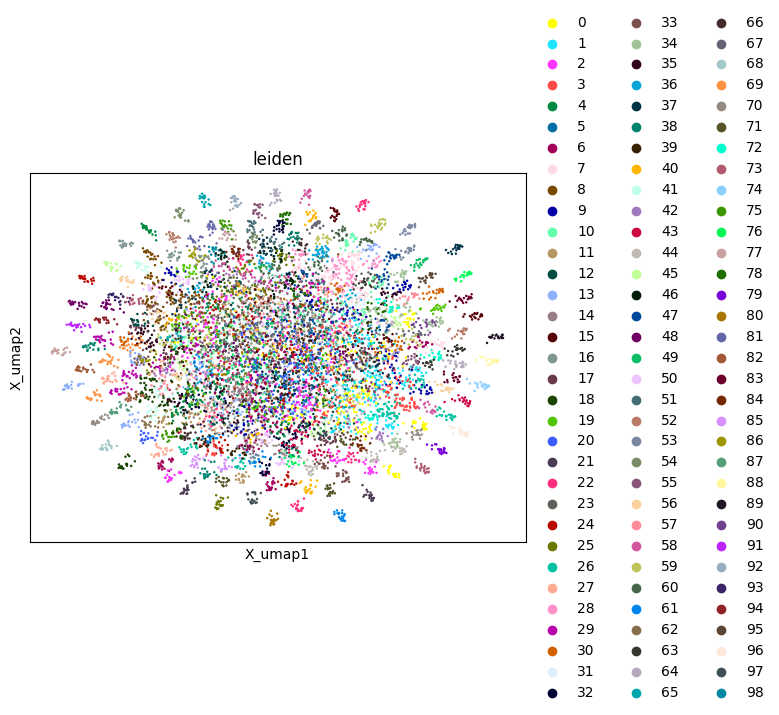

Leiden plot saved to outputs/mowgli_output/mowgli_dataset_Pbmc10k_leiden_plot.png
Saving latent data
Latent data saved to outputs/mowgli_output/mowgli_latent_dataset_Pbmc10k.h5ad
Loading latent data
Latent data loaded successfully.

=== Processing dataset: dataset_TEA ===
Initializing Mowgli Model
Loaded configuration successfully.
Loaded models for dataset_TEA: dict_keys(['mowgli'])

Training model: mowgli for dataset: dataset_TEA
Moving Mowgli model to cuda:0
Mowgli model successfully moved to cuda:0
Training Mowgli Model


  2%|▏         | 4/200 [00:06<05:13,  1.60s/it, loss=-0.43950918, mass_transported=0.212, loss_inner=0.20928127, inner_steps=0, gpu_memory_allocated=2.38e+9]


Training completed.
Generating UMAP plot


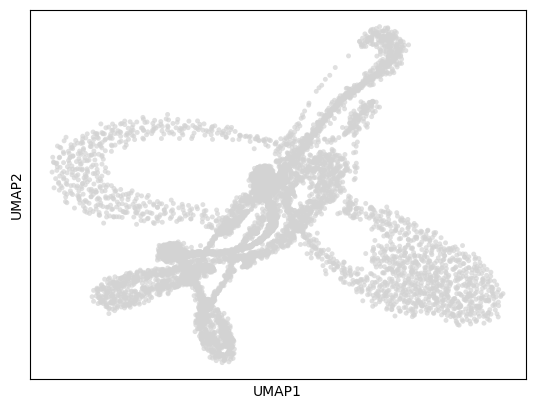

UMAP plot saved to outputs/mowgli_output/mowgli_dataset_TEA_umap_plot.png


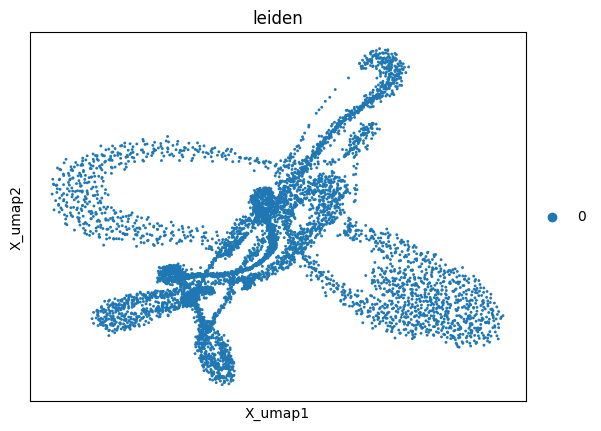

Leiden plot saved to outputs/mowgli_output/mowgli_dataset_TEA_leiden_plot.png
Saving latent data
Latent data saved to outputs/mowgli_output/mowgli_latent_dataset_TEA.h5ad
Loading latent data
Latent data loaded successfully.


In [4]:
# Iterate over datasets
for dataset_name, dataset_data in datasets.items():
    print(f"\n=== Processing dataset: {dataset_name} ===")
    
    # Select models for this dataset
    models = my_trainer.model_select(dataset_name, dataset_data)
    print(f"Loaded models for {dataset_name}: {models.keys()}")
    
    # Train each model
    for model_name, model in models.items():
        print(f"\nTraining model: {model_name} for dataset: {dataset_name}")
        model.to()
        model.train()
        model.umap() 
        model.save_latent()
        model.load_latent()

